In [1]:
import os

In [2]:
train_cats_dir = "./Data1/cats_and_dogs_small/train/cats"
train_dogs_dir = "./Data1/cats_and_dogs_small/train/dogs"
test_cats_dir = "./Data1/cats_and_dogs_small/test/cats"
test_dogs_dir = "./Data1/cats_and_dogs_small/test/dogs"
validation_cats_dir = "./Data1/cats_and_dogs_small/validation/cats"
validation_dogs_dir = "./Data1/cats_and_dogs_small/validation/dogs"

print("train(개) 개수 : ",len(os.listdir(train_dogs_dir)))
print("train(고양이) 개수 : ",len(os.listdir(train_cats_dir)))
print("test(개) 개수 : ",len(os.listdir(test_dogs_dir)))
print("test(고양이) 개수 : ",len(os.listdir(test_cats_dir)))
print("validation(개) 개수 : ",len(os.listdir(validation_dogs_dir)))
print("validation(고양이) 개수 : ",len(os.listdir(validation_cats_dir)))

train(개) 개수 :  1000
train(고양이) 개수 :  1000
test(개) 개수 :  500
test(고양이) 개수 :  500
validation(개) 개수 :  500
validation(고양이) 개수 :  500


##### CF. 편향(bias)의 역할
    - https://de-novo.org/2018/04/17/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-1/
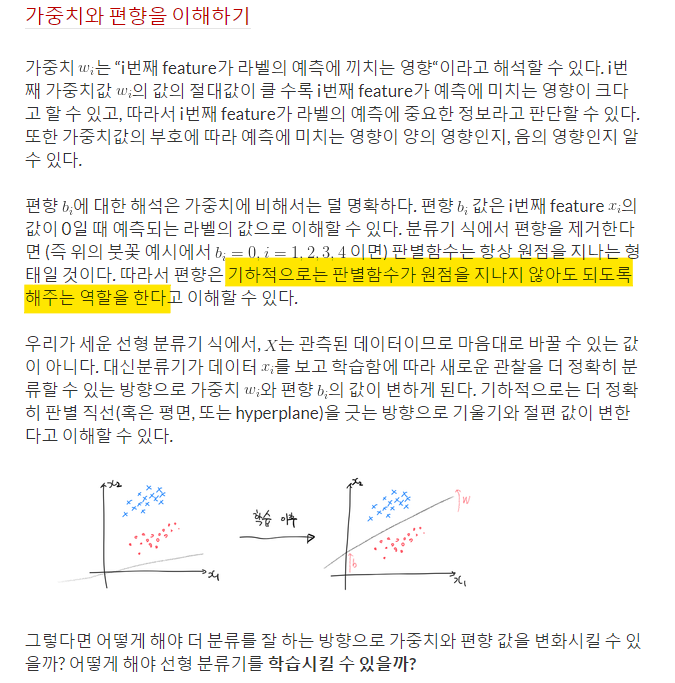

# 22th

### generator를 이용한 이미지 전처리

In [3]:
# 이미지 전처리 (전처리(변환), 증식)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 픽셀값을 0-255 범위에서 0.0-1.0 범위로 변경
train_gen = ImageDataGenerator(rescale=1.0/255)
test_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

# 폴더로부터 데이터를 가져와서 처리
train_dir = "./Data1/cats_and_dogs_small/train/"
test_dir = "./Data1/cats_and_dogs_small/test/"
validation_dir = "./Data1/cats_and_dogs_small/validation/"

train_generator = train_gen.flow_from_directory(
                    train_dir,                # 데이터를 가져올 폴더
                    target_size = (150,150),  # 이미지 <데이터> 크기를 동일하게 맞춤
                    batch_size = 20,          # 한번에 읽어올 이미지의 개수
                    class_mode = "binary"     # 라벨링 방법 (디렉토리명에서 알파벳순으로 0부터 라벨링 함)
                    )                             # - binary : 0과 1만으로 라벨링
                                                  # - categorical : 0부터 폴더의 개수만큼 라벨링 (원핫인코딩을 함) ___ 변함
                                                  # - sparse : 0부터 폴더의 개수만큼 라벨링 (원핫인코딩을 하지 않음)
    
test_generator = test_gen.flow_from_directory(
                    test_dir,
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = "binary" 
                  )

validation_generator = validation_gen.flow_from_directory(
                        validation_dir,
                        target_size = (150,150),
                        batch_size = 20,
                        class_mode = "binary" 
                      )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
train_generator.class_indices, test_generator.class_indices   ## cats가 0, dogs가 1인 라벨을 갖고있는 것을 확인

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

#### 신경망 초기화

In [5]:
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#### 신경망 설계

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

# CNN층 (입력층)
#             필터수, 필터크기,    입력데이터 크기,                     활성화함수
model1.add(Conv2D(32, (3,3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Conv2D(64,  (3,3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Flatten())

# 은닉층
model1.add(Dense(512, activation="relu"))
model1.add(Dropout(0.5))   ##50프로
model1.add(Dense(128, activation="relu"))
model1.add(Dropout(0.3))   ##30프로

# 출력층
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [7]:
# class_mode : categorical 이라면 -->        categorical_crossentropy
# class_mode : sparse      이라면 --> sparse_categorical_crossentropy
model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [8]:
h1 = model1.fit_generator(generator=train_generator,
                         epochs=20,
                         steps_per_epoch=100,
                         validation_data=validation_generator,
                         validation_steps=50
                         )

model1.save_weights("./model/dogs_and_cats_001.hdf5")

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 7s 74ms/step - loss: 0.7214 - acc: 0.4945 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 5s 53ms/step - loss: 0.6921 - acc: 0.5130 - val_loss: 0.6927 - val_acc: 0.5080
Epoch 3/20
100/100 [==============================] - 5s 54ms/step - loss: 0.6951 - acc: 0.5050 - val_loss: 0.6902 - val_acc: 0.5550
Epoch 4/20
100/100 [==============================] - 5s 54ms/step - loss: 0.6898 - acc: 0.5550 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 5/20
100/100 [==============================] - 6s 57ms/step - loss: 0.6862 - acc: 0.5530 - val_loss: 0.6822 - val_acc: 0.5290
Epoch 6/20
100/100 [==============================] - 5s 54ms/step - loss: 0.6693 - acc: 0.6010 - val_loss: 0.6667 - val_acc: 0.6330
Epoch 7/20
100/100 [=============

#### 결과 시각화

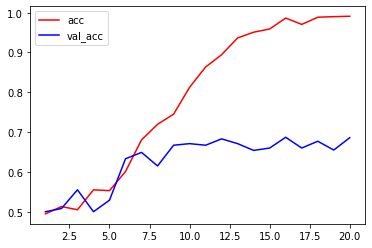

In [9]:
import matplotlib.pyplot as plt

acc = h1.history["acc"]
val_acc = h1.history["val_acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.legend()

- dropout 넣기 전
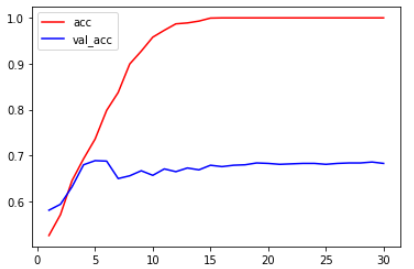

In [10]:
## 계산하는 방법으로써 '증식'
import numpy as np

pred = model1.predict_generator(test_generator)
##pred

p = np.where(pred>0.80, "개", "고양이")   #0.5보다 크면 개, 작으면 고양이

for i in range(10):
    print(test_generator.filenames[i])
    print(p[i])

Instructions for updating:
Please use Model.predict, which supports generators.
cats\cat.1000.jpg
['고양이']
cats\cat.1001.jpg
['개']
cats\cat.1002.jpg
['고양이']
cats\cat.1003.jpg
['개']
cats\cat.1004.jpg
['고양이']
cats\cat.1005.jpg
['고양이']
cats\cat.1006.jpg
['개']
cats\cat.1007.jpg
['고양이']
cats\cat.1008.jpg
['고양이']
cats\cat.1009.jpg
['개']


### 증식(augmentation)을 통한 데이터 확장
    - 훈련데이터가 부족한 문제를 해결하기 위한 것
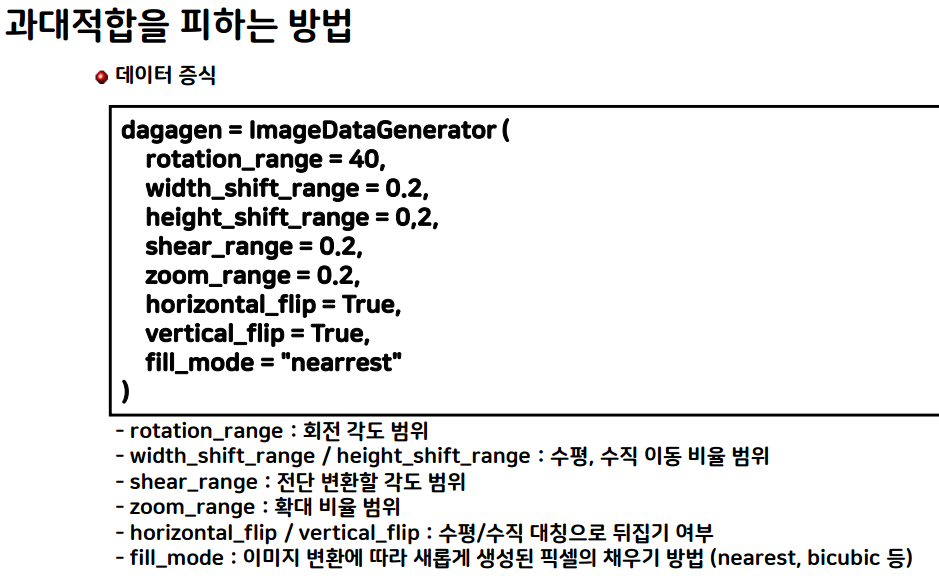

In [11]:
train_gen = ImageDataGenerator(rescale=1.0/255,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.1, ##height는 많이변하니깐 10프로만 변형~~
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode="nearest")  # 확대 시에 이미지가 깨지는 문제를 보정

test_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

In [12]:
train_generator = train_gen.flow_from_directory(
                    train_dir,                
                    target_size = (150,150),
                    batch_size = 20,        
                    class_mode = "binary"    
                    )                            
                       
    
test_generator = test_gen.flow_from_directory(
                    test_dir,
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = "binary" 
                  )

validation_generator = validation_gen.flow_from_directory(
                        validation_dir,
                        target_size = (150,150),
                        batch_size = 20,
                        class_mode = "binary" 
                      )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["acc"])

h2 = model1.fit_generator(generator=train_generator,
                         epochs=20,
                         steps_per_epoch=100,
                         validation_data=validation_generator,
                         validation_steps=50
                         )

model1.save_weights("./model/dogs_and_cats_002.hdf5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 12s 121ms/step - loss: 0.8195 - acc: 0.6460 - val_loss: 0.6141 - val_acc: 0.6680
Epoch 2/20
100/100 [==============================] - 12s 117ms/step - loss: 0.5920 - acc: 0.6915 - val_loss: 0.6098 - val_acc: 0.6870
Epoch 3/20
100/100 [==============================] - 11s 115ms/step - loss: 0.5801 - acc: 0.7010 - val_loss: 0.5962 - val_acc: 0.6750
Epoch 4/20
100/100 [==============================] - 12s 115ms/step - loss: 0.5635 - acc: 0.7025 - val_loss: 0.5619 - val_acc: 0.7180
Epoch 5/20
100/100 [==============================] - 12s 115ms/step - loss: 0.5418 - acc: 0.7240 - val_loss: 0.5608 - val_acc: 0.7160
Epoch 6/20
100/100 [==============================] - 11s 114ms/step - loss: 0.5419 - acc: 0.7275 - val_loss: 0.5920 - val_acc: 0.7260
Epoch 7/20
100/100 [==============================] - 11s 114ms/step - loss: 0.5415 - acc: 0.7325

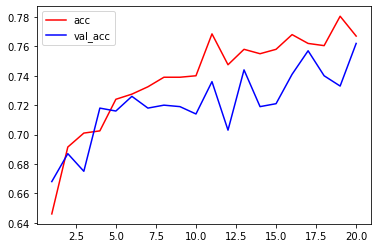

In [14]:
import matplotlib.pyplot as plt

acc = h2.history["acc"]
val_acc = h2.history["val_acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.legend()

- 증식을 한 가짜이미지라서 맞았다틀렸다 함 (~흔들흔들~)
- 증식만 했는데 훈련데이터도 어느정도 반영됐다!

### 전이학습(Transfer Learning) : 좋은 모델을 가져다가 붙여서 쓰는 것
    - 잘 된 신경망 가져다 붙이는 것 
    - 기존모델의 특성가져다가 쓰는 특성모델 추출방법 , 그대로가져와서 여기서돌리고 동결 / 살짝 미세조정(-->에서 증식 가능)
    
    - 1) 특성모델 추출방법
        - 보냈다가 값 가져오는것
        - 모델그대로가져와서 동결
    - 2) 미세조정 방법
        - 가지고온것에 w,b업데이트할수있도록 만드는것

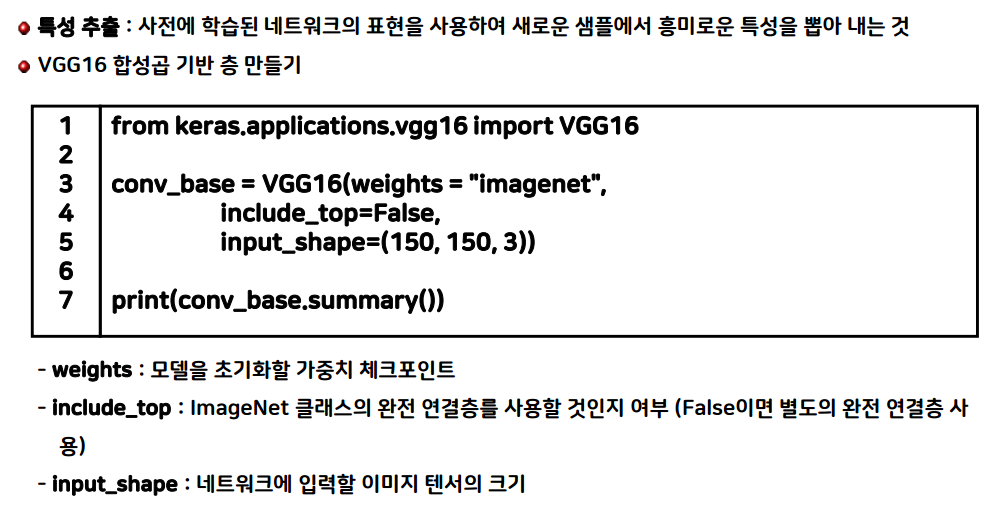

In [16]:
# VGG16 다운로드
from tensorflow.keras.applications import VGG16   # 여러 모델들 중 가져다 쓰기 좋은모델이라 VGG16 사용

# weights="imagenet" : 초기화할 가중치
# include_top = False : VGG16의 Dense 층을 가져올 것인지 여부
# input_shape=(150,150,3) : 입력 데이터 크기
conv_base = VGG16(weights="imagenet",
                 include_top = False,
                 input_shape =(150,150,3))   ##우리이미지랑 똑같이 만들어줌

58892288/58889256 [==============================] - 7s 0us/step


In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255)    ##증식일단안할거니깐 train만 (VGG16으로 훈련시키려고하는것이므로)

train_dir = "./Data1/cats_and_dogs_small/train/"

# VGG16을 이용해서 특성을 추출하는 함수
def extract_feature(directory, count, size):
    train_generator = train_gen.flow_from_directory(
                        directory,                
                        target_size = (150,150),  
                        batch_size = size,          
                        class_mode = "binary"     
                        )  
    # VGG16의 결과로 받을 최종 특성    ###미리 VGG에서 받을것들 초기화한 두 라인
    feature = np.zeros(shape=(count, 4, 4, 512))
    # 라벨의 수
    label = np.zeros(shape=count)  ##넘어오는수마다 라벨있으므로 =count
    
                           
    
    i = 0   ###카운트를위한 i
    
    # VGG16에서 predict() 함수를 이용하여 배치 사이즈만큼
    # 이미지의 특성과 라벨을 가져옴!
    for image_data, label_data in train_generator:    ### 위에서 VGG돌아가고 여기에 feature와 label넘어옴  #이미지, 라벨(여기선 0과1)
        # VGG16에 generator에서 넘어온 이미지 데이터를 넣어 줌 (--> 그러면 4*4*512인 특성이 넘어오겠지~~~)
        # predict() : 추출된 특성맵을 반환
        feature_batch = conv_base.predict(image_data)
        feature[i*size:(i+1)*size] = feature_batch          ### i를count해서 첫번째20개채우고 두번째20개채우고... 채워주기(왜 20개? batch_size떄문)
        label[i*size:(i+1)*size] = label_data
        
        i = i + 1
        
        # 이미지 개수보다 커지면 중지해라!
        if i*size >= count:   ##count에 있는것은 이미지의 갯수
            break
    return feature, label

*scaling한 이미지와 label이 넘어오는 generator

In [19]:
train_feature, train_label = extract_feature(train_dir, 2000, 20)  ##train_dir폴더에있는 2000개의 이미지 넣어줌. 배치사이즈20개씩
test_feature, test_label = extract_feature(test_dir, 1000, 20)
validation_feature, validation_label = extract_feature(validation_dir, 1000, 20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 23th

In [ ]:
# VGG16에서 넘어온 데이터를 Dense()에 맞도록 변경
train_feature = np.reshape()
